# CERA 2019 presentation: Python for Analyzing and Visualizing Education Data
#### 45-min presentation at CERA 2019 on using python for ananalyzing and visualizing education data. First half will illustrate a typical data analysis workflow and the second part will be sharing resources for further learning.

<details>
    <summary><strong>Goal</strong></summary>
    The goal of this notebook is to provide an example of a typical data analysis workflow.
    <ul>
        <li> measurable goals for this notebook </li>
        <li> Identify <i>variables of interest in dataset. </li>
        <li> Clean the dataset and create an analytical file.</li>
        <li> Create effective data visualizations illustrating some of the findings </li>
    </ul>
</details>

<details>
    <summary><strong>Context</strong></summary>
    We've downloaded raw data from <strong><i>IPEDS</i></strong> and are now in the process of creating an analytical mastefile.
</details>

In [1]:
import pandas as pd
from zipfile import ZipFile
from pathlib import Path
from tools import tree
from datetime import datetime as dt
today = dt.today().strftime("%d-%b-%y")

today

'18-Nov-19'

In [2]:
RAW_DATA = Path("../data/raw/")
INTERIM_DATA = Path("../data/interim/")
PROCESSED_DATA = Path("../data/processed/")
EXTERNAL_DATA = Path("../data/external/")
FINAL_DATA = Path("../data/final/")

In [3]:
tree(INTERIM_DATA)

+ ..\data\interim
    + processed-data-18-Nov-19.csv
    + processed-data-18-Nov-19.xlsx


In [4]:
data = pd.read_csv(INTERIM_DATA / 'processed-data-18-Nov-19.csv')

In [5]:
data.head()

,UnitID,Institution Name,Sector of institution (HD2018),Level of institution (HD2018),Control of institution (HD2018),Degree-granting status (HD2018),Degree of urbanization (Urban-centric locale) (HD2018),Tribal college (HD2018),Historically Black College or University (HD2018),Graduation rate total cohort (DRVGR2017_RV),...,Graduation rate - Bachelor degree within 6 years American Indian or Alaska Native (DRVGR2017_RV),Graduation rate - Bachelor degree within 6 years Asian/Native Hawaiian/Pacific Islander (DRVGR2017_RV),Graduation rate - Bachelor degree within 6 years Asian (DRVGR2017_RV),Graduation rate - Bachelor degree within 6 years Native Hawaiian or Other Pacific Islander (DRVGR2017_RV),Graduation rate - Bachelor degree within 6 years Black non-Hispanic (DRVGR2017_RV),Graduation rate - Bachelor degree within 6 years Hispanic (DRVGR2017_RV),Graduation rate - Bachelor degree within 6 years White non-Hispanic (DRVGR2017_RV),Graduation rate - Bachelor degree within 6 years two or more races (DRVGR2017_RV),Graduation rate - Bachelor degree within 6 years Race/ethnicity unknown (DRVGR2017_RV),Graduation rate - Bachelor degree within 6 years Nonresident alien (DRVGR2017_RV)
0,491464,ABC Adult School,"Public, less-than 2-year",Less than 2 years (below associate),Public,"Nondegree-granting, primarily postsecondary",Suburb: Large,No,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,485500,ABCO Technology,"Private for-profit, less-than 2-year",Less than 2 years (below associate),Private for-profit,"Nondegree-granting, primarily postsecondary",Suburb: Large,No,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,488031,Abraham Lincoln University,"Private for-profit, 4-year or above",Four or more years,Private for-profit,Degree-granting,City: Midsize,No,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,457271,Academy for Jewish Religion-California,"Private not-for-profit, 4-year or above",Four or more years,Private not-for-profit,Degree-granting,City: Large,No,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,462062,Academy for Salon Professionals,"Private for-profit, less-than 2-year",Less than 2 years (below associate),Private for-profit,"Nondegree-granting, primarily postsecondary",City: Large,No,No,41.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


tip: use `.T` when looking at a really _wide_ `DataFrame`. It transposes its view.

In [6]:
data.head().T

,0,1,2,3,4
UnitID,491464,485500,488031,457271,462062
Institution Name,ABC Adult School,ABCO Technology,Abraham Lincoln University,Academy for Jewish Religion-California,Academy for Salon Professionals
Sector of institution (HD2018),"Public, less-than 2-year","Private for-profit, less-than 2-year","Private for-profit, 4-year or above","Private not-for-profit, 4-year or above","Private for-profit, less-than 2-year"
Level of institution (HD2018),Less than 2 years (below associate),Less than 2 years (below associate),Four or more years,Four or more years,Less than 2 years (below associate)
Control of institution (HD2018),Public,Private for-profit,Private for-profit,Private not-for-profit,Private for-profit
Degree-granting status (HD2018),"Nondegree-granting, primarily postsecondary","Nondegree-granting, primarily postsecondary",Degree-granting,Degree-granting,"Nondegree-granting, primarily postsecondary"
Degree of urbanization (Urban-centric locale) (HD2018),Suburb: Large,Suburb: Large,City: Midsize,City: Large,City: Large
Tribal college (HD2018),No,No,No,No,No
Historically Black College or University (HD2018),No,No,No,No,No
Graduation rate total cohort (DRVGR2017_RV),NaN,NaN,NaN,NaN,41


# Our interest is graduation rates
We can filter further: All graduation rate variables are variations of `Graduation rate total cohort (DRVGR2017_RV)` which is _Graduation rate of first-time, full-time degree or certificate-seeking students - 2011 cohort (4-year institutions) and 2014 cohort (less-than-4-year institutions). (As of August 31, 2017)_. So if `Graduation rate total cohort (DRVGR2017_RV)` is null or **NaN** we can drop the observation.

In [8]:
mask_gradrate = data['Graduation rate  total cohort (DRVGR2017_RV)'].isna()

In [10]:
data[~mask_gradrate].head()

,UnitID,Institution Name,Sector of institution (HD2018),Level of institution (HD2018),Control of institution (HD2018),Degree-granting status (HD2018),Degree of urbanization (Urban-centric locale) (HD2018),Tribal college (HD2018),Historically Black College or University (HD2018),Graduation rate total cohort (DRVGR2017_RV),...,Graduation rate - Bachelor degree within 6 years American Indian or Alaska Native (DRVGR2017_RV),Graduation rate - Bachelor degree within 6 years Asian/Native Hawaiian/Pacific Islander (DRVGR2017_RV),Graduation rate - Bachelor degree within 6 years Asian (DRVGR2017_RV),Graduation rate - Bachelor degree within 6 years Native Hawaiian or Other Pacific Islander (DRVGR2017_RV),Graduation rate - Bachelor degree within 6 years Black non-Hispanic (DRVGR2017_RV),Graduation rate - Bachelor degree within 6 years Hispanic (DRVGR2017_RV),Graduation rate - Bachelor degree within 6 years White non-Hispanic (DRVGR2017_RV),Graduation rate - Bachelor degree within 6 years two or more races (DRVGR2017_RV),Graduation rate - Bachelor degree within 6 years Race/ethnicity unknown (DRVGR2017_RV),Graduation rate - Bachelor degree within 6 years Nonresident alien (DRVGR2017_RV)
4,462062,Academy for Salon Professionals,"Private for-profit, less-than 2-year",Less than 2 years (below associate),Private for-profit,"Nondegree-granting, primarily postsecondary",City: Large,No,No,41.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,108232,Academy of Art University,"Private for-profit, 4-year or above",Four or more years,Private for-profit,Degree-granting,City: Large,No,No,40.0,...,0.0,41.0,42.0,33.0,23.0,34.0,36.0,20.0,34.0,55.0
7,454722,Academy of Esthetics and Cosmetology,"Private for-profit, less-than 2-year",Less than 2 years (below associate),Private for-profit,"Nondegree-granting, primarily postsecondary",Suburb: Large,No,No,77.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,262369,Adrian's College of Beauty Turlock,"Private for-profit, less-than 2-year",Less than 2 years (below associate),Private for-profit,"Nondegree-granting, primarily postsecondary",Suburb: Small,No,No,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,400187,Advance Beauty College,"Private for-profit, less-than 2-year",Less than 2 years (below associate),Private for-profit,"Nondegree-granting, primarily postsecondary",Suburb: Large,No,No,88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data = data[~mask_gradrate]

In [12]:
data.shape

(510, 36)

In [13]:
mask_degree = data['Degree-granting status (HD2018)'] == 'Degree-granting'
data = data[mask_degree]

In [14]:
data.shape

(322, 36)

# Grouping data

In [25]:
data.groupby("Degree of urbanization (Urban-centric locale) (HD2018)")['Graduation rate  total cohort (DRVGR2017_RV)'].mean()

Degree of urbanization (Urban-centric locale) (HD2018)
City: Large        51.934579
City: Midsize      54.021739
City: Small        47.450000
Rural: Distant     36.500000
Rural: Fringe      37.937500
Suburb: Large      52.067308
Suburb: Midsize    41.000000
Suburb: Small      48.857143
Town: Distant      27.000000
Town: Remote       38.500000
Name: Graduation rate  total cohort (DRVGR2017_RV), dtype: float64

In [27]:
data.pivot_table(values = 'Graduation rate  total cohort (DRVGR2017_RV)', index = 'Degree of urbanization (Urban-centric locale) (HD2018)', columns = 'Sector of institution (HD2018)', aggfunc = 'mean')

Sector of institution (HD2018),"Private for-profit, 2-year","Private for-profit, 4-year or above","Private not-for-profit, 2-year","Private not-for-profit, 4-year or above","Public, 2-year","Public, 4-year or above"
Degree of urbanization (Urban-centric locale) (HD2018),,,,,,
City: Large,69.600000,50.3,68.25,56.593750,25.950000,56.500000
City: Midsize,70.222222,60.0,NaN,74.750000,29.666667,54.000000
City: Small,65.500000,79.0,27.00,57.750000,33.125000,54.000000
Rural: Distant,NaN,NaN,NaN,79.000000,22.333333,NaN
Rural: Fringe,NaN,51.0,NaN,57.000000,25.444444,49.500000
Suburb: Large,66.500000,60.0,NaN,63.714286,32.580645,41.000000
Suburb: Midsize,29.000000,NaN,NaN,75.000000,28.000000,49.600000
Suburb: Small,NaN,NaN,NaN,NaN,30.500000,73.333333
Town: Distant,NaN,NaN,NaN,NaN,27.000000,NaN


In [26]:
data.pivot_table(values = 'Graduation rate  total cohort (DRVGR2017_RV)', index = ['Degree of urbanization (Urban-centric locale) (HD2018)', 'Level of institution (HD2018)'], columns = 'Control of institution (HD2018)', aggfunc = 'mean')

Control of institution (HD2018)                                                      Private for-profit  \
Degree of urbanization (Urban-centric locale) (... Level of institution (HD2018)                          
City: Large                                        At least 2 but less than 4 years           69.600000   
                                                   Four or more years                         50.300000   
City: Midsize                                      At least 2 but less than 4 years           70.222222   
                                                   Four or more years                         60.000000   
City: Small                                        At least 2 but less than 4 years           65.500000   
                                                   Four or more years                         79.000000   
Rural: Distant                                     At least 2 but less than 4 years                 NaN   
                                                   Four or more years                               NaN   
Rural: Fringe                                      At least 2 but less than 4 years                 NaN   
                                                   Four or more years                         51.000000   
Suburb: Large                                      At least 2 but less than 4 years           66.500000   
                                                   Four or more years                         60.000000   
Suburb: Midsize                                    At least 2 but less than 4 years           29.000000   
                                                   Four or more years                               NaN   
Suburb: Small                                      At least 2 but less than 4 years                 NaN   
                                                   Four or more years                               NaN   
Town: Distant                                      At least 2 but less than 4 years                 NaN   
Town: Remote                                       At least 2 but less than 4 years                 NaN   
                                                   Four or more years                               NaN   

Control of institution (HD2018)                                                      Private not-for-profit  \
Degree of urbanization (Urban-centric locale) (... Level of institution (HD2018)                              
City: Large                                        At least 2 but less than 4 years               68.250000   
                                                   Four or more years                             56.593750   
City: Midsize                                      At least 2 but less than 4 years                     NaN   
                                                   Four or more years                             74.750000   
City: Small                                        At least 2 but less than 4 years               27.000000   
                                                   Four or more years                             57.750000   
Rural: Distant                                     At least 2 but less than 4 years                     NaN   
                                                   Four or more years                             79.000000   
Rural: Fringe                                      At least 2 but less than 4 years                     NaN   
                                                   Four or more years                             57.000000   
Suburb: Large                                      At least 2 but less than 4 years                     NaN   
                                                   Four or more years                             63.714286   
Suburb: Midsize                                    At least 2 but less than 4 years                     NaN   
                                                   Four or more years                  

***

# Visualizing data

## Tidy data
Tidy data is a standard way of mapping the meaning of a dataset to its structure. A dataset is messy or tidy depending on how rows, columns and tables are matched up with observations, variables and types. In tidy data:

1. Each variable forms a column.
2. Each observation forms a row.
3. Each type of observational unit forms a table.


### Messy data

In [31]:
messy = data.pivot_table(values = 'Graduation rate  total cohort (DRVGR2017_RV)', index = 'Degree of urbanization (Urban-centric locale) (HD2018)', columns = 'Sector of institution (HD2018)', aggfunc = 'mean')
messy

Sector of institution (HD2018),"Private for-profit, 2-year","Private for-profit, 4-year or above","Private not-for-profit, 2-year","Private not-for-profit, 4-year or above","Public, 2-year","Public, 4-year or above"
Degree of urbanization (Urban-centric locale) (HD2018),,,,,,
City: Large,69.600000,50.3,68.25,56.593750,25.950000,56.500000
City: Midsize,70.222222,60.0,NaN,74.750000,29.666667,54.000000
City: Small,65.500000,79.0,27.00,57.750000,33.125000,54.000000
Rural: Distant,NaN,NaN,NaN,79.000000,22.333333,NaN
Rural: Fringe,NaN,51.0,NaN,57.000000,25.444444,49.500000
Suburb: Large,66.500000,60.0,NaN,63.714286,32.580645,41.000000
Suburb: Midsize,29.000000,NaN,NaN,75.000000,28.000000,49.600000
Suburb: Small,NaN,NaN,NaN,NaN,30.500000,73.333333
Town: Distant,NaN,NaN,NaN,NaN,27.000000,NaN


### Tidy data

In [32]:
tidy = data.groupby(['Degree of urbanization (Urban-centric locale) (HD2018)', 'Sector of institution (HD2018)'])['Graduation rate  total cohort (DRVGR2017_RV)'].mean().reset_index()
tidy

,Degree of urbanization (Urban-centric locale) (HD2018),Sector of institution (HD2018),Graduation rate total cohort (DRVGR2017_RV)
0,City: Large,"Private for-profit, 2-year",69.600000
1,City: Large,"Private for-profit, 4-year or above",50.300000
2,City: Large,"Private not-for-profit, 2-year",68.250000
3,City: Large,"Private not-for-profit, 4-year or above",56.593750
4,City: Large,"Public, 2-year",25.950000
5,City: Large,"Public, 4-year or above",56.500000
6,City: Midsize,"Private for-profit, 2-year",70.222222
7,City: Midsize,"Private for-profit, 4-year or above",60.000000
8,City: Midsize,"Private not-for-profit, 4-year or above",74.750000
9,City: Midsize,"Public, 2-year",29.666667


***
# Charts!

### Altair

> Altair is a declarative statistical visualization library for Python, based on Vega and Vega-Lite, and the source is available on GitHub.

> With Altair, you can spend more time understanding your data and its meaning. Altair’s API is simple, friendly and consistent and built on top of the powerful Vega-Lite visualization grammar. This elegant simplicity produces beautiful and effective visualizations with a minimal amount of code.

\- [**altair-viz.github.io**](altair-viz.github.io)

In [33]:
import altair as alt

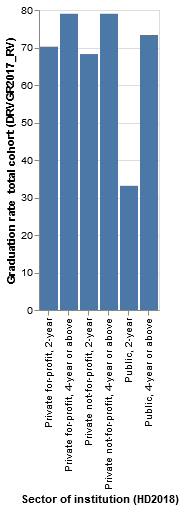

In [50]:
alt.Chart(data = tidy).mark_bar().encode(
    x = 'Sector of institution (HD2018)',
    y = 'Graduation rate  total cohort (DRVGR2017_RV)',
)

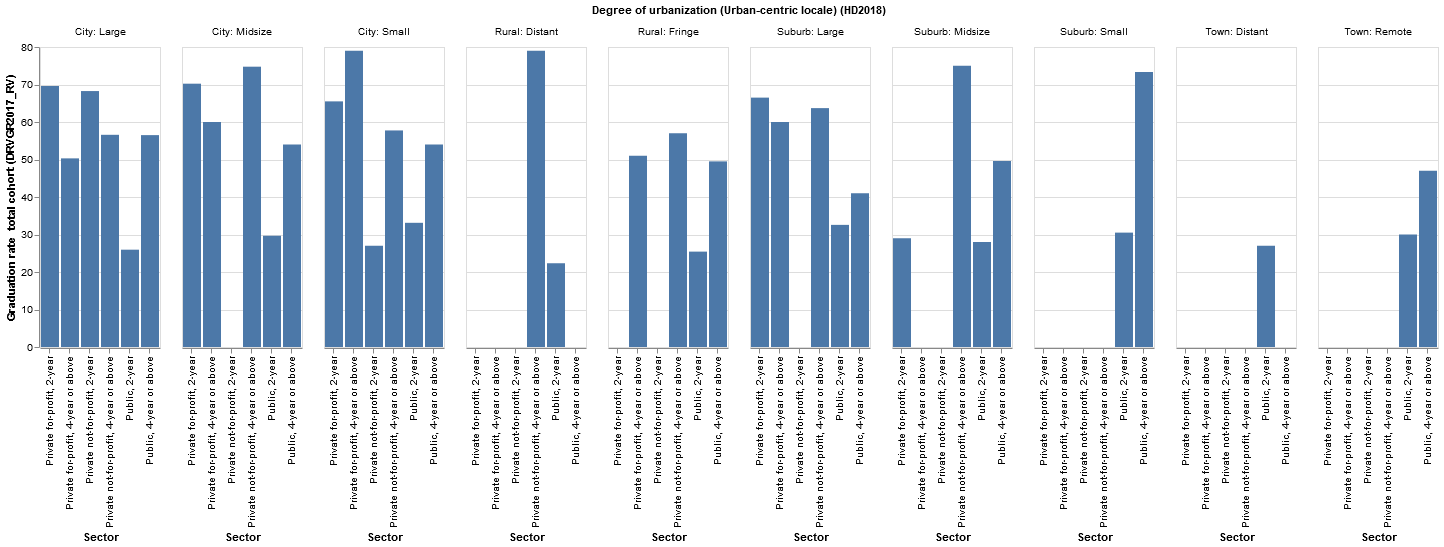

In [53]:
alt.Chart(tidy).mark_bar().encode(
    x = alt.X('Sector of institution (HD2018)', axis = alt.Axis(title = 'Sector')),
    y = alt.Y('Graduation rate  total cohort (DRVGR2017_RV)'),
    facet = alt.Facet('Degree of urbanization (Urban-centric locale) (HD2018)')
)

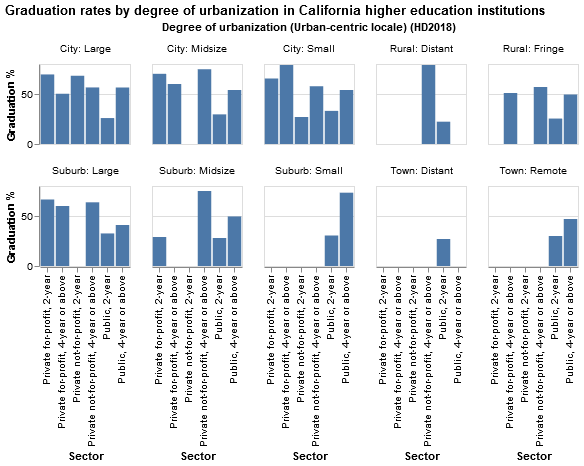

In [57]:
alt.Chart(tidy).mark_bar().encode(
    x = alt.X('Sector of institution (HD2018)', axis = alt.Axis(title = 'Sector')),
    y = alt.Y('Graduation rate  total cohort (DRVGR2017_RV)', axis = alt.Axis(title = "Graduation %")),
    facet = alt.Facet('Degree of urbanization (Urban-centric locale) (HD2018)')
).properties(
    title='Graduation rates by degree of urbanization in California higher education institutions',
    columns=5,
    width=90,
    height=80
)

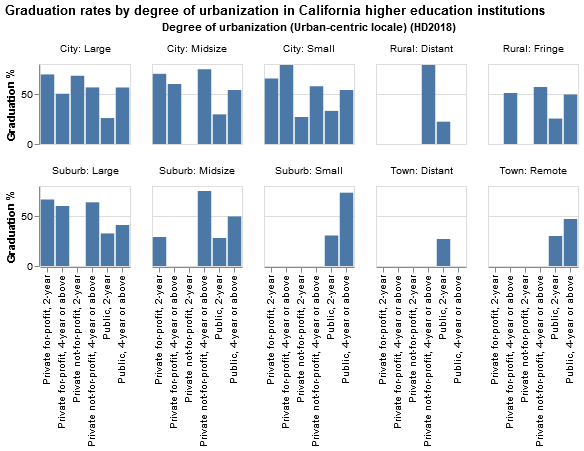

In [65]:
alt.Chart(tidy).mark_bar().encode(
    x = alt.X('Sector of institution (HD2018)', axis = alt.Axis(title = '')),
    y = alt.Y('Graduation rate  total cohort (DRVGR2017_RV)', axis = alt.Axis(title = "Graduation %")),
    facet = alt.Facet('Degree of urbanization (Urban-centric locale) (HD2018)'),
    tooltip = alt.Tooltip(['Graduation rate  total cohort (DRVGR2017_RV)'], title = 'Grad rate')
).properties(
    title='Graduation rates by degree of urbanization in California higher education institutions',
    columns=5,
    width=90,
    height=80
)

In [66]:
final_chart = alt.Chart(tidy).mark_bar().encode(
    x = alt.X('Sector of institution (HD2018)', axis = alt.Axis(title = '')),
    y = alt.Y('Graduation rate  total cohort (DRVGR2017_RV)', axis = alt.Axis(title = "Graduation %")),
    facet = alt.Facet('Degree of urbanization (Urban-centric locale) (HD2018)'),
    tooltip = alt.Tooltip(['Graduation rate  total cohort (DRVGR2017_RV)'], title = 'Grad rate')
).properties(
    title='Graduation rates by degree of urbanization in California higher education institutions',
    columns=5,
    width=90,
    height=80
)

In [68]:
final_chart.save('../reports/figures/chart.html')